In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [26]:
df = pd.read_csv("./data/india_housing_prices.csv")
df.head(2)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction


In [27]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [28]:
# 결측값 없음
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [29]:
# 기초통계
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [30]:
df[['Price_per_SqFt','Year_Built','Floor_No']].describe()
# Price_per_SqFt = 0 인값 존재
# Floor_No = 0 인 값 존재

,Price_per_SqFt,Year_Built,Floor_No
count,250000.000000,250000.000000,250000.000000
mean,0.130597,2006.520012,14.966800
std,0.130747,9.808575,8.948047
min,0.000000,1990.000000,0.000000
25%,0.050000,1998.000000,7.000000
50%,0.090000,2007.000000,15.000000
75%,0.160000,2015.000000,23.000000
max,0.990000,2023.000000,30.000000


In [31]:
# Price_per_SqFt = 0 인값은 소수점 2자리 밑에 값이라 0으로 처리됨
aa = df[['Size_in_SqFt','Price_in_Lakhs','Price_per_SqFt']]
aa['Price_per_SqFt_cal'] = aa['Price_in_Lakhs']/aa['Size_in_SqFt']
aa[aa['Price_per_SqFt'] == 0]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_28464\109827836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['Price_per_SqFt_cal'] = aa['Price_in_Lakhs']/aa['Size_in_SqFt']


,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Price_per_SqFt_cal
190,4467,11.62,0.0,0.002601
214,3471,17.01,0.0,0.004901
272,4497,21.01,0.0,0.004672
356,3498,12.80,0.0,0.003659
387,4775,18.34,0.0,0.003841
...,...,...,...,...
249053,4576,19.69,0.0,0.004303
249250,2544,11.96,0.0,0.004701
249415,4900,18.88,0.0,0.003853
249491,4002,15.94,0.0,0.003983


In [32]:
len(df['Locality'].unique())

500

In [33]:
# 라벨 인코더
categories = ['State','City','Locality','Property_Type','Furnished_Status',\
              'Public_Transport_Accessibility','Parking_Space','Security',\
                'Amenities','Facing','Owner_Type','Availability_Status']
def encode_feature(df):
    for cate_item in categories:
        df_label = df
        label_encoder = LabelEncoder()
        df_label[cate_item] = label_encoder.fit_transform(df_label[cate_item])
    return df_label
df_label = encode_feature(df)

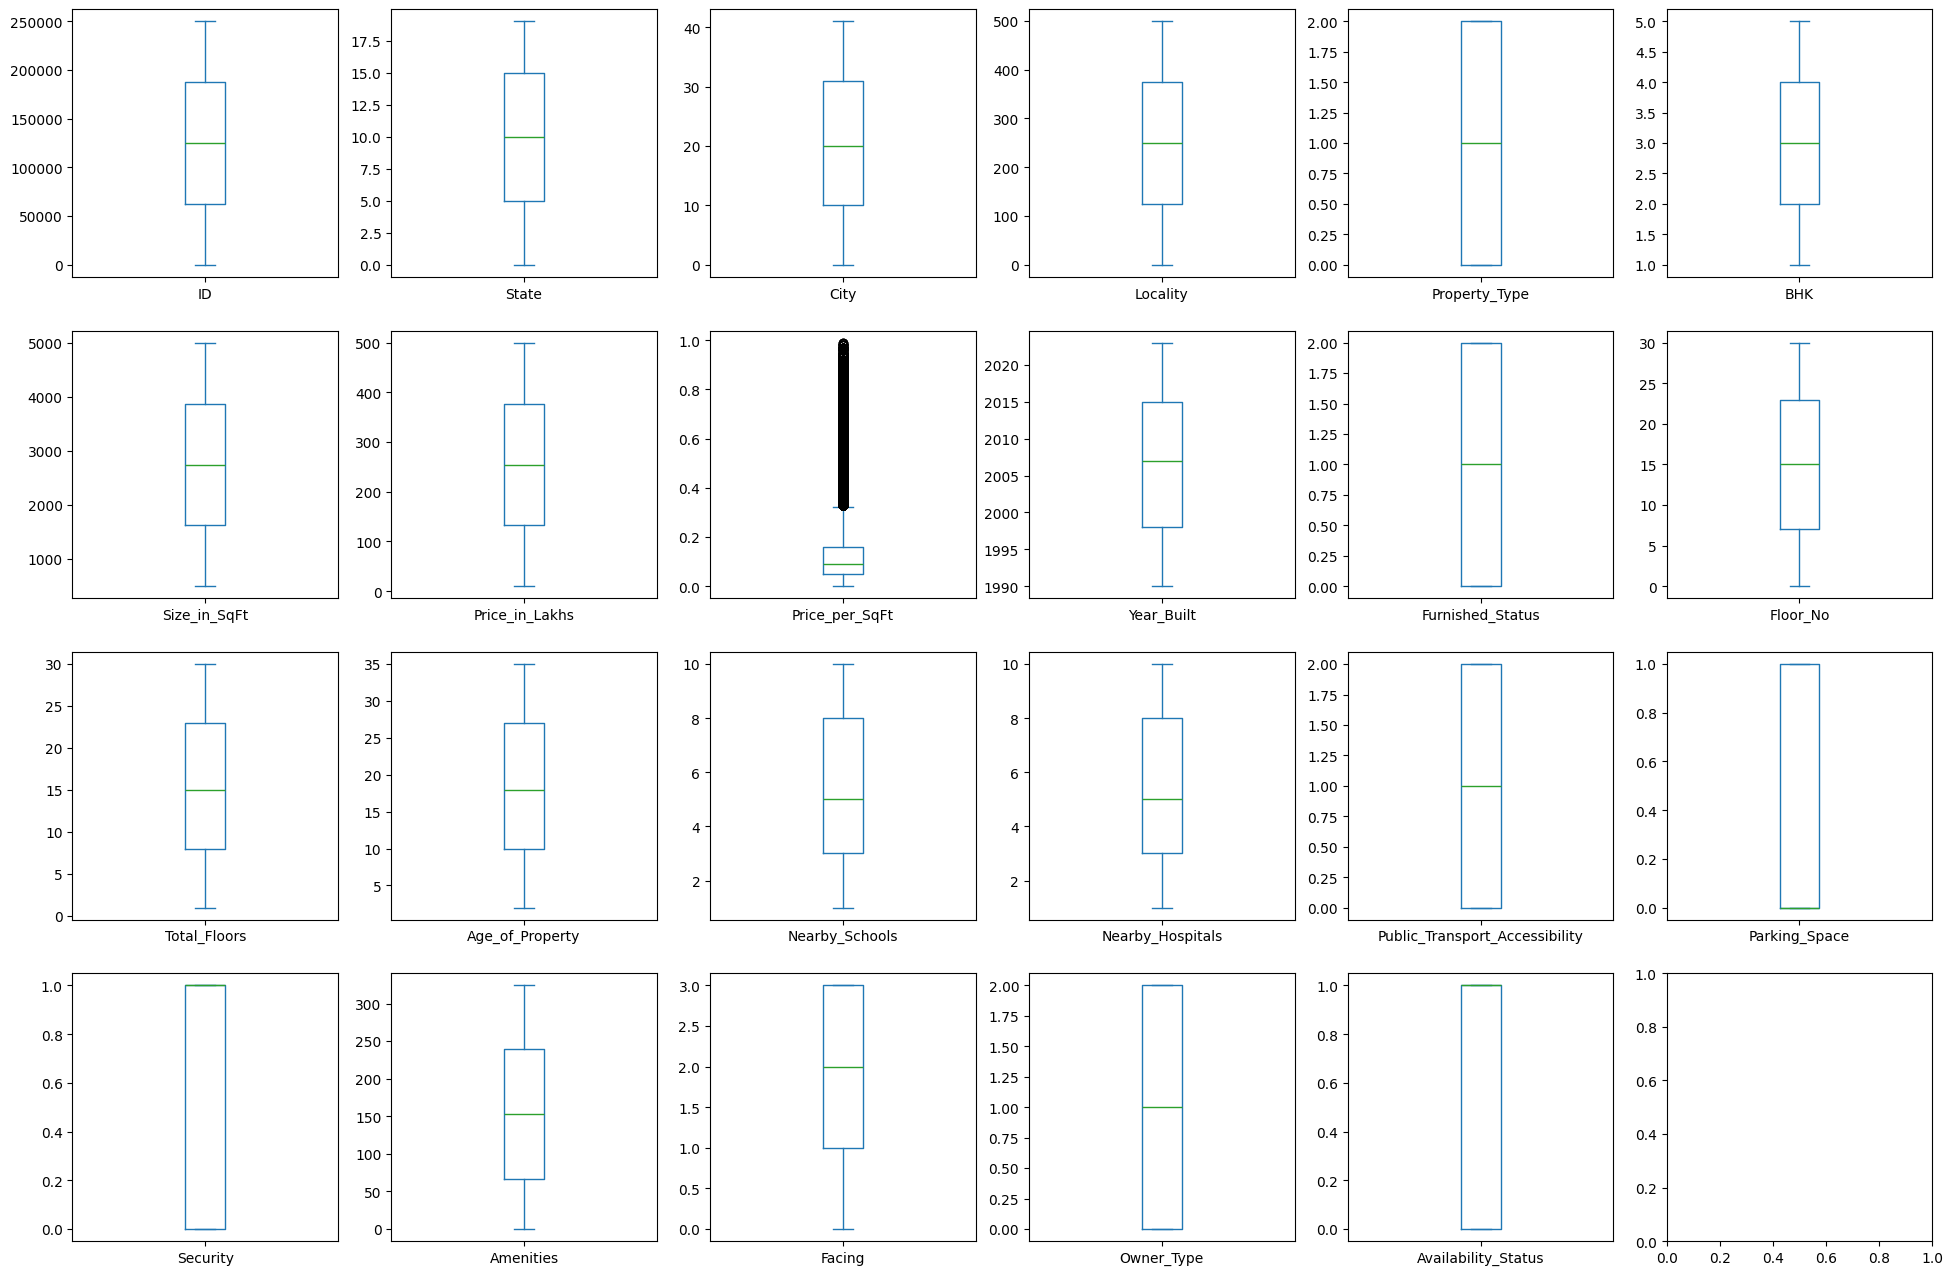

In [34]:
# 이상치 탐색
fig, ax = plt.subplots(figsize=(24,16),ncols=6,nrows=4)

columns = df_label.columns

for i, col_name in enumerate(columns):
    row = i // 6
    col = i % 6
    ax_temp = ax[row][col]

    df_label[col_name].plot(kind='box',ax=ax_temp)


<Axes: >

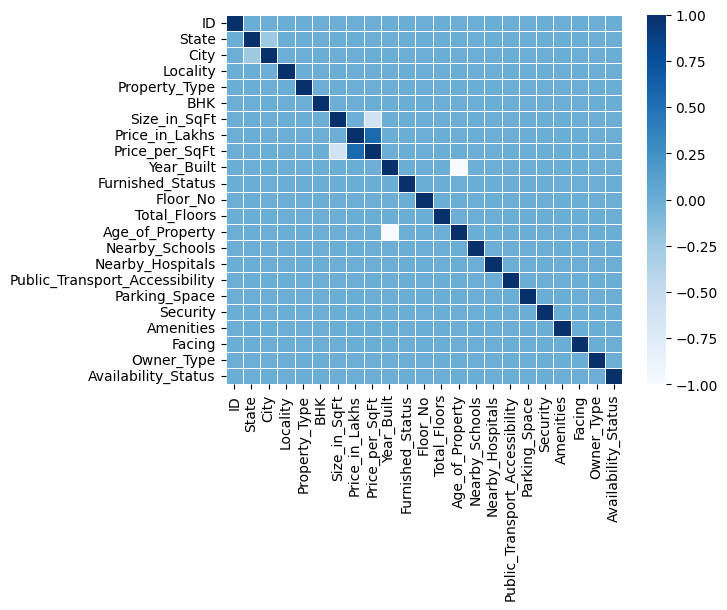

In [35]:
# heatmap
sns.heatmap(data = df_label.corr(numeric_only=True),  fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# regplot
fig, ax = plt.subplots(figsize=(18,18),ncols=3,nrows=3)

columns = df_label.columns[:9]

for i, col_name in enumerate(columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]

    sns.regplot(data=df, x=col_name, y='Price_in_Lakhs', ax=ax_temp)

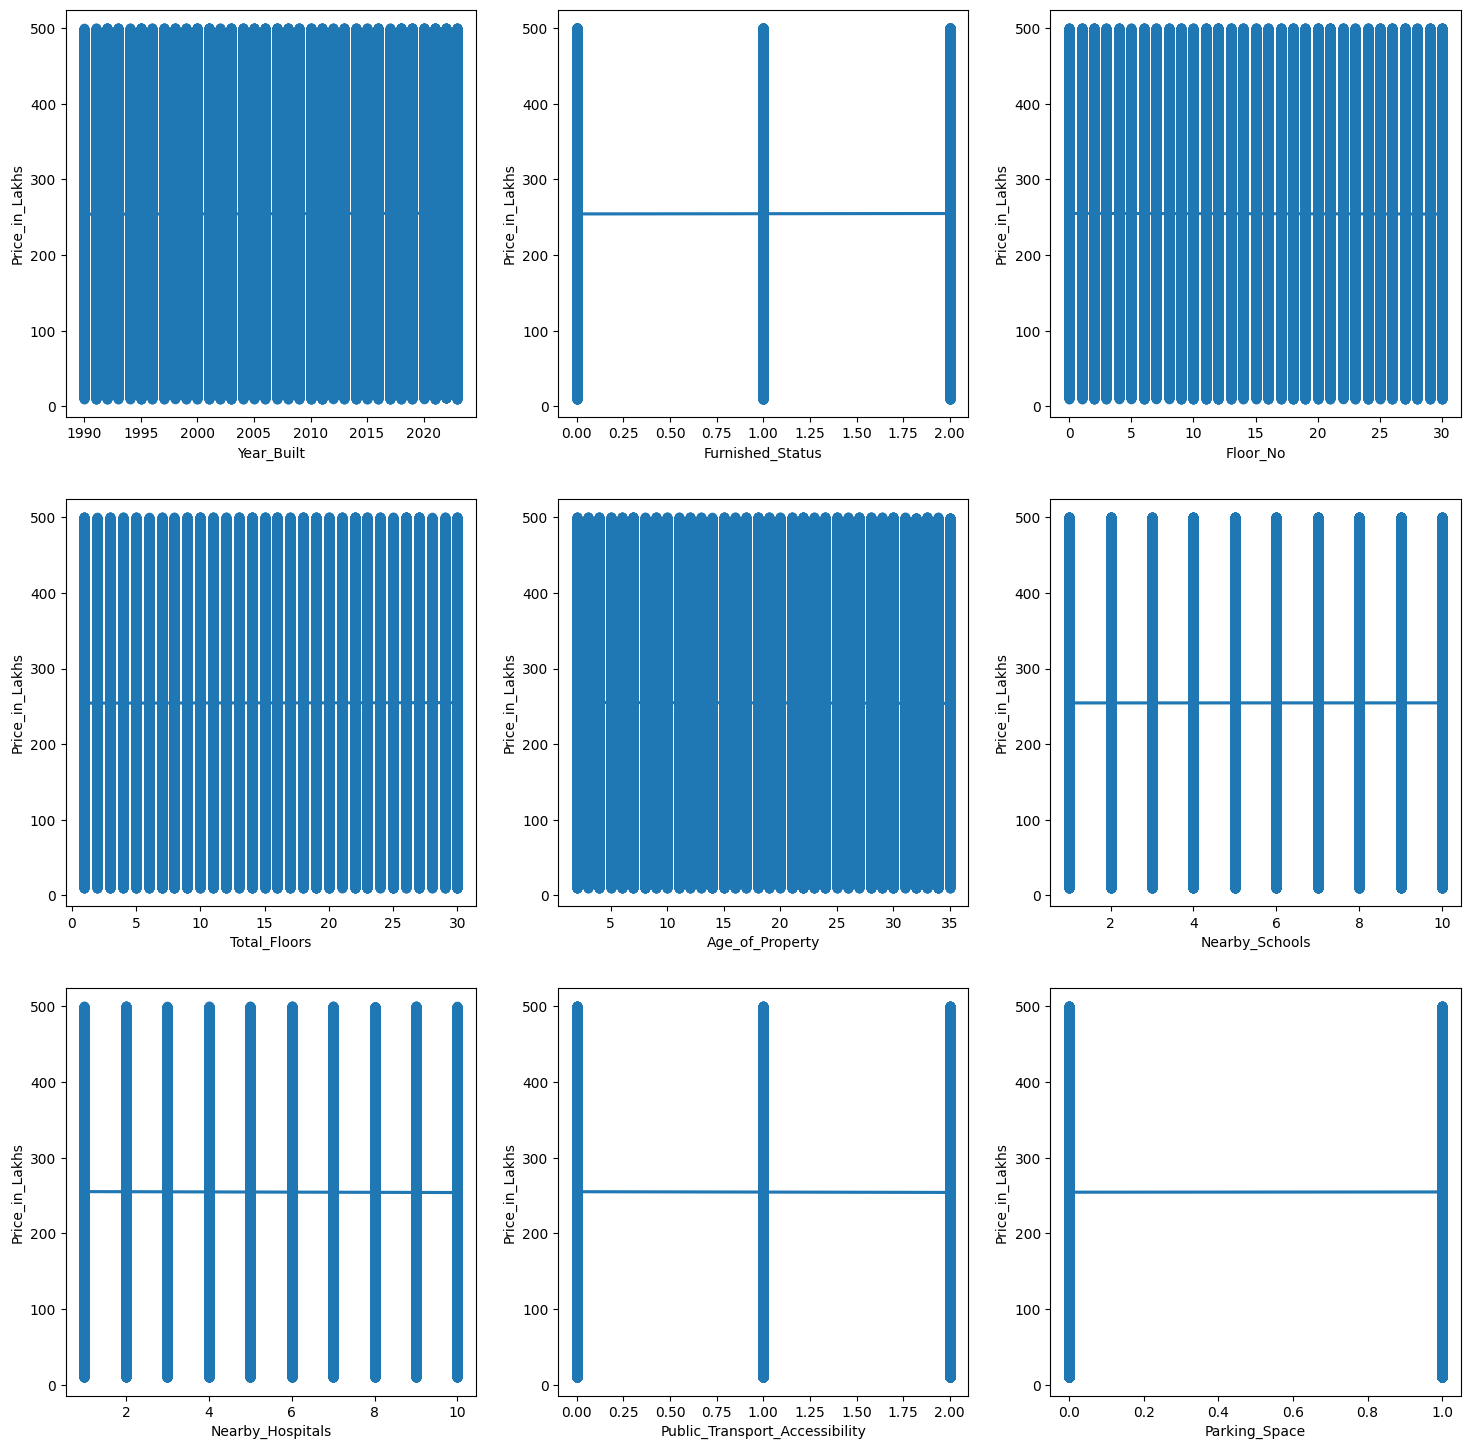

In [42]:
# regplot
fig, ax = plt.subplots(figsize=(18,18),ncols=3,nrows=3)

columns = df_label.columns[9:18]

for i, col_name in enumerate(columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]

    sns.regplot(data=df, x=col_name, y='Price_in_Lakhs', ax=ax_temp)

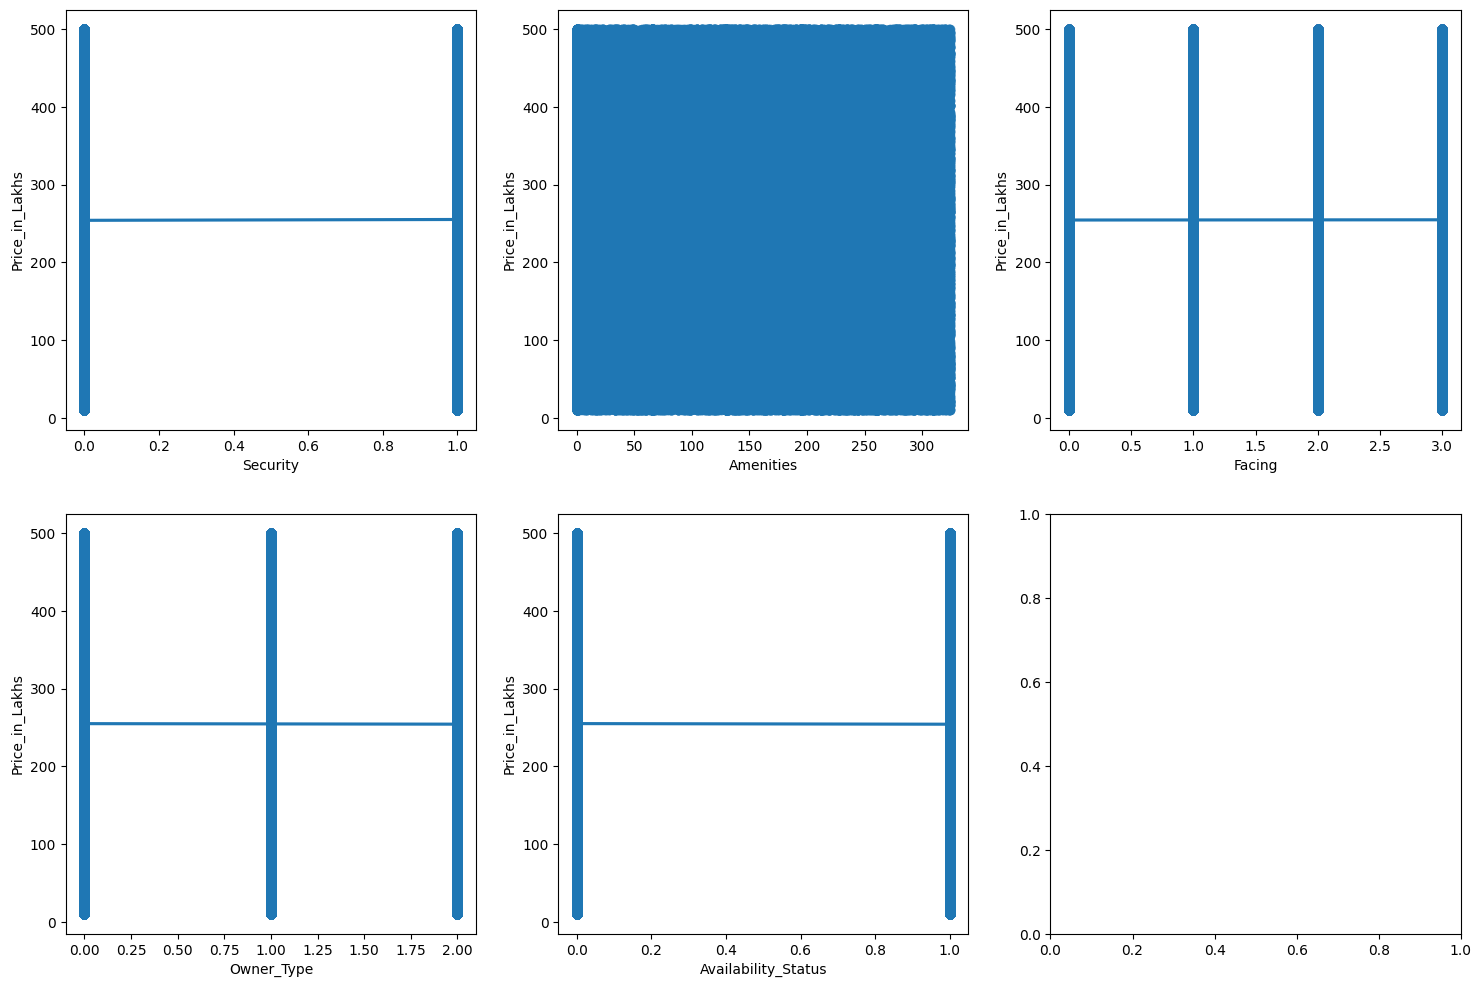

In [43]:
# regplot
fig, ax = plt.subplots(figsize=(18,12),ncols=3,nrows=2)

columns = df_label.columns[18:]

for i, col_name in enumerate(columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]

    sns.regplot(data=df, x=col_name, y='Price_in_Lakhs', ax=ax_temp)

In [44]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,15,6,483,0,1,4740,489.76,0.10,1990,...,35,10,3,0,0,0,238,3,2,0
1,2,11,33,434,1,3,2364,195.52,0.08,2008,...,17,8,1,1,0,1,211,1,1,1
2,3,13,25,75,0,2,3642,183.79,0.05,1997,...,28,9,8,1,1,0,63,2,0,0
3,4,14,21,326,1,2,2741,300.29,0.11,1991,...,34,5,7,0,1,1,206,1,1,0
4,5,14,19,407,2,4,4823,182.90,0.04,2002,...,23,4,9,1,0,1,222,0,1,0


2023 Property_Type
0    2521
1    2554
2    2493
Name: ID, dtype: int64


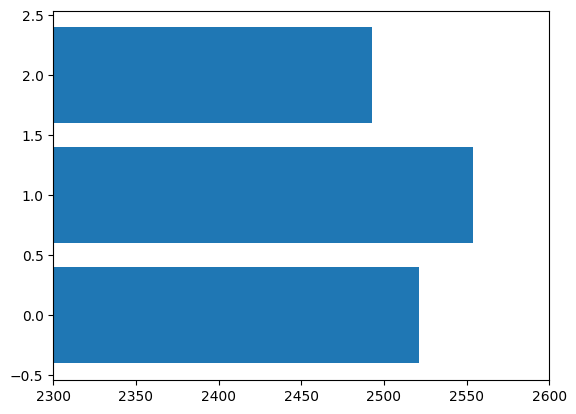

In [45]:
# 연도별 건축 종류 수
# 경향성 찾기 어려움
import matplotlib.pyplot as plt
from IPython import display
year_list = df['Year_Built'].unique()
year_list = np.sort(year_list)
for i in year_list:
    df_tmp = df[df['Year_Built'] == i]
    df_tmp_1 = df_tmp.groupby(['Property_Type'])['ID'].count()
    print(i, df_tmp_1)
    plt.xlim(2300, 2600)
    gragh = plt.barh(df_tmp_1.index.values, df_tmp_1.values)  
    plt.show()  
    plt.pause(0.2)
    # plt.cla()
    display.clear_output(wait=True)

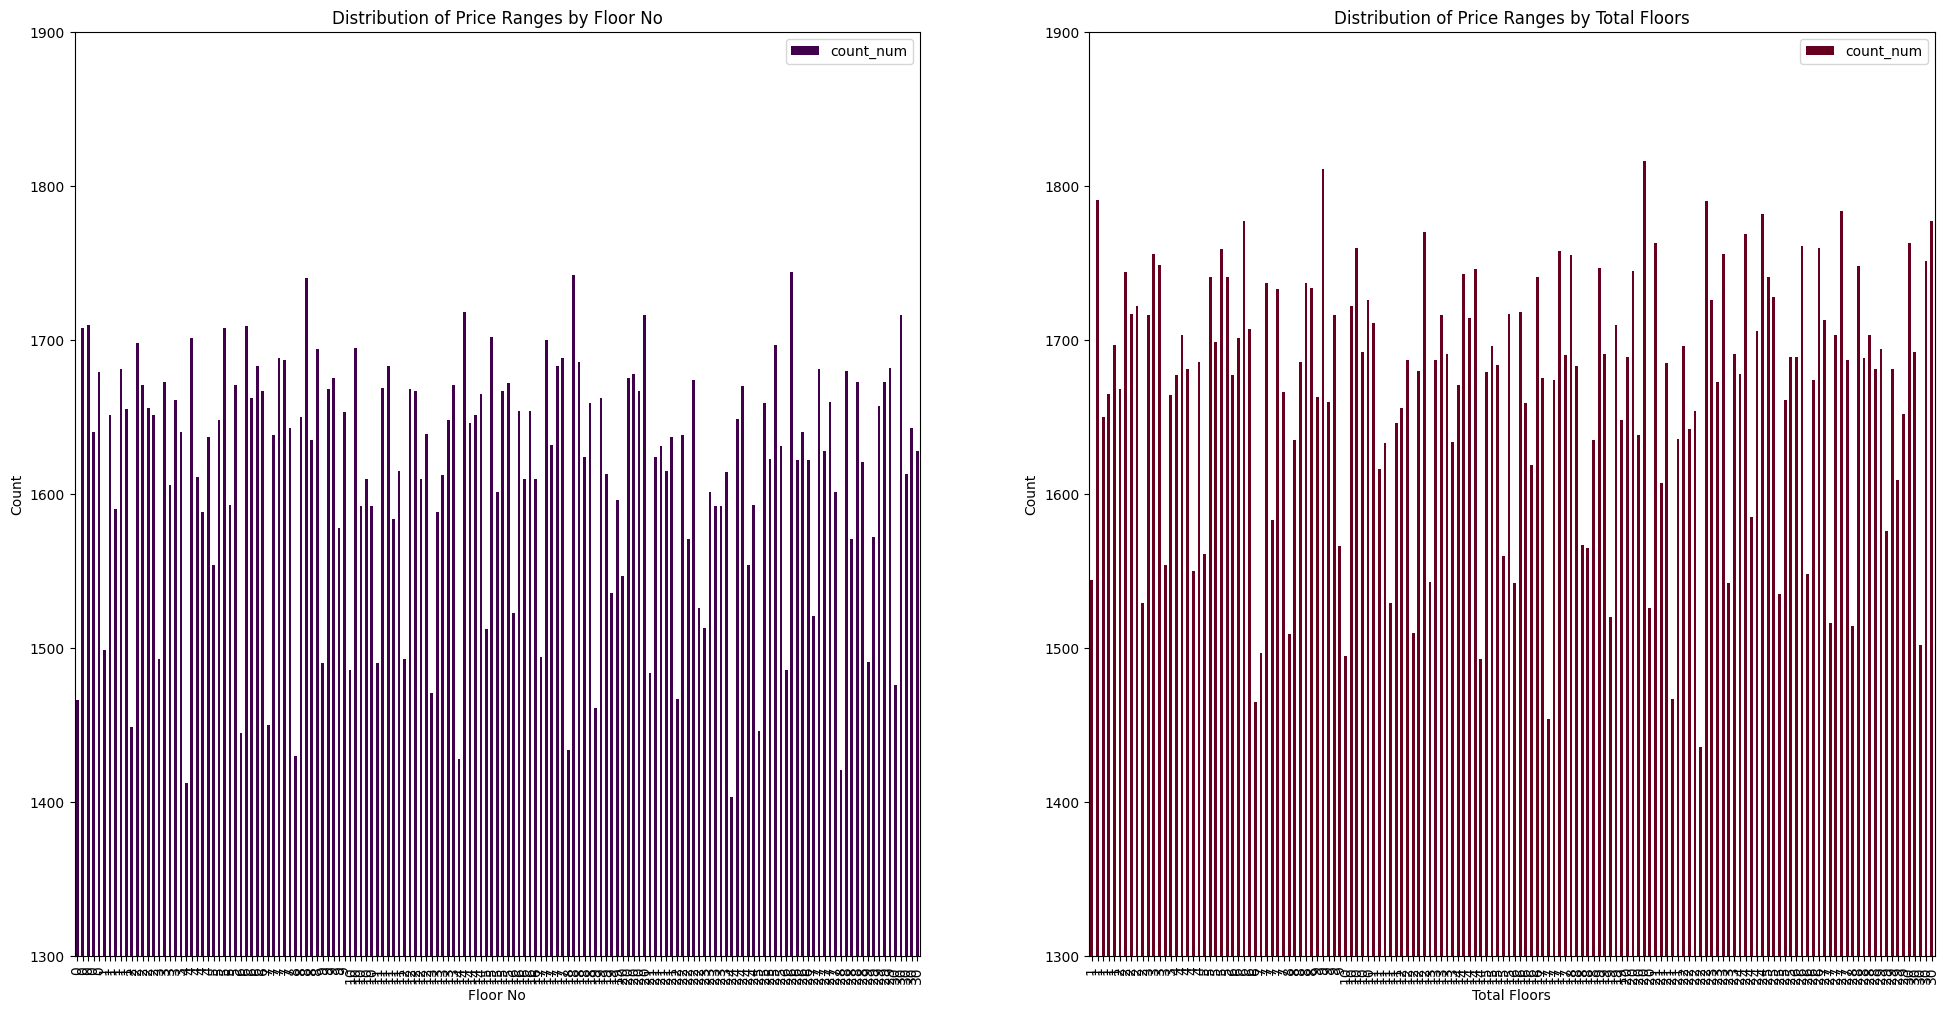

In [73]:
# floor 변수들 확인
fig, ax = plt.subplots(figsize=(24,12),ncols=2,nrows=1)
# 필요한 열 선택 및 전처리
graph_df = df[['Floor_No','Total_Floors', 'Price_in_Lakhs']].assign(
    Total_Floors=lambda x: x['Total_Floors'].astype(str),
    Price_in_Lakhs=lambda x: x['Price_in_Lakhs'].apply(
        lambda y: '400~500' if y >= 400 else '300~400' if y >= 300 else '200~300' if y >= 200 else '100~200' if y >= 100 else '0~100'
    )
)

# 그룹화 및 데이터 재구성
graph_df_2 = (graph_df.groupby(['Floor_No', 'Price_in_Lakhs'])
              .size()
              .reset_index(name='count_num')
              .assign(Floor_No=lambda x: x['Floor_No'].astype(int))
              .sort_values('Floor_No'))
graph_df_3 = (graph_df.groupby(['Total_Floors', 'Price_in_Lakhs'])
              .size()
              .reset_index(name='count_num')
              .assign(Total_Floors=lambda x: x['Total_Floors'].astype(int))
              .sort_values('Total_Floors'))

# 시각화
my_colors = [(0.5,0.4), (0.75,0.25)]*31
graph_1 = graph_df_2.plot(
    kind='bar',
    x='Floor_No',
    y='count_num',
    title='Distribution of Price Ranges by Floor No',
    xlabel='Floor No',
    ylabel='Count',
    ax=ax[0],
    colormap='PRGn'
)

graph_2 = graph_df_3.plot(
    kind='bar',
    x='Total_Floors',
    y='count_num',
    title='Distribution of Price Ranges by Total Floors',
    xlabel='Total Floors',
    ylabel='Count',
    ax=ax[1],
    colormap='RdGy'
)
# graph_1.set_xticklabels(rotation=45)
# graph_2.set_xticklabels(rotation=45)
graph_1.set_ylim(1300,1900)
graph_2.set_ylim(1300,1900)
plt.show()

# 결과 확인
# graph_df_2
